In [1]:
#import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS
import datetime
import ast
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#import file
df=pd.read_csv("H:\\Sem 2\\Text Mining\\Assignment\\ted-talks\\ted_main.csv")
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
#convert the Unix timestamps into a human readable format
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [4]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,28-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Growth of TED Talks over the years

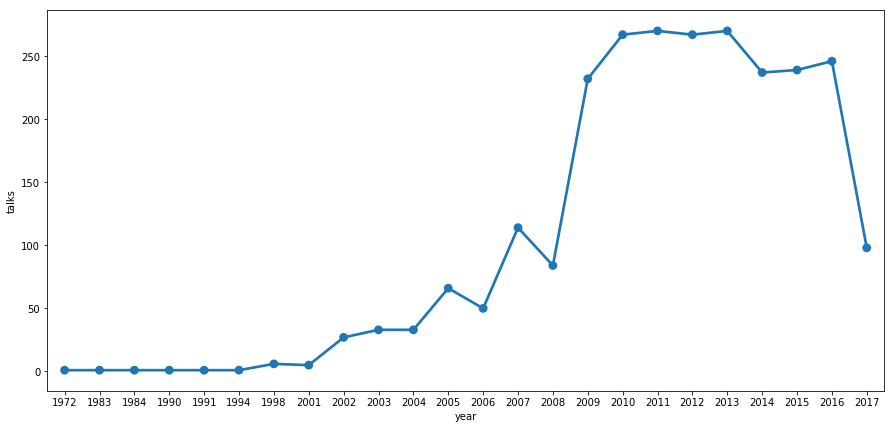

In [5]:
#Split Year from Film_Date
df['year'] = df['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

#Plot
plt.figure(figsize=(15,7))
sns.pointplot(x='year', y='talks', data=year_df)

# Popular TED Speakers

In [6]:
#Sorting Main_Speaker by appearances
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


# Speaker's Occupation

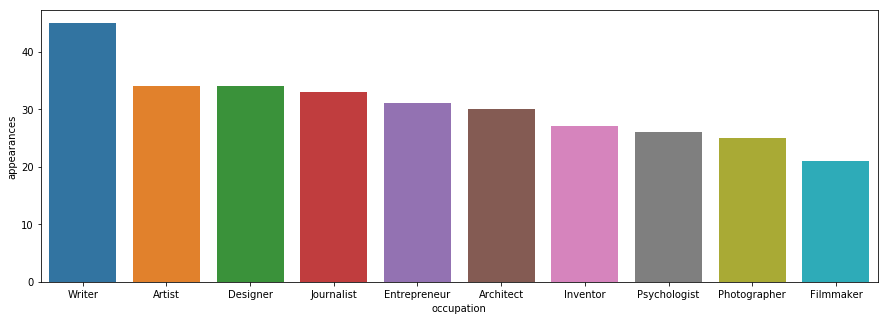

In [7]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

# Popular Themes

In [8]:
#Split the related tags into separate rows
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,year,theme
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,education


In [9]:
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,year,theme
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,education


In [10]:
len(theme_df['theme'].value_counts())

416

In [11]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


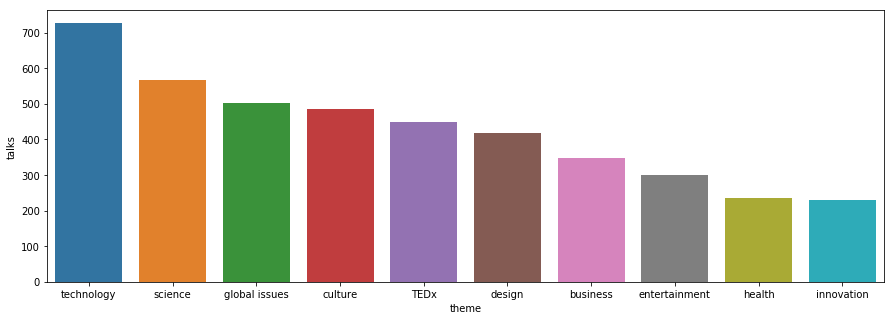

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.show()

In [13]:
pop_theme_talks = theme_df[(theme_df['theme'].isin(pop_themes.head(8)['theme'])) & (theme_df['theme'] != 'TEDx')]
pop_theme_talks['year'] = pop_theme_talks['year'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['year'] > 2008]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


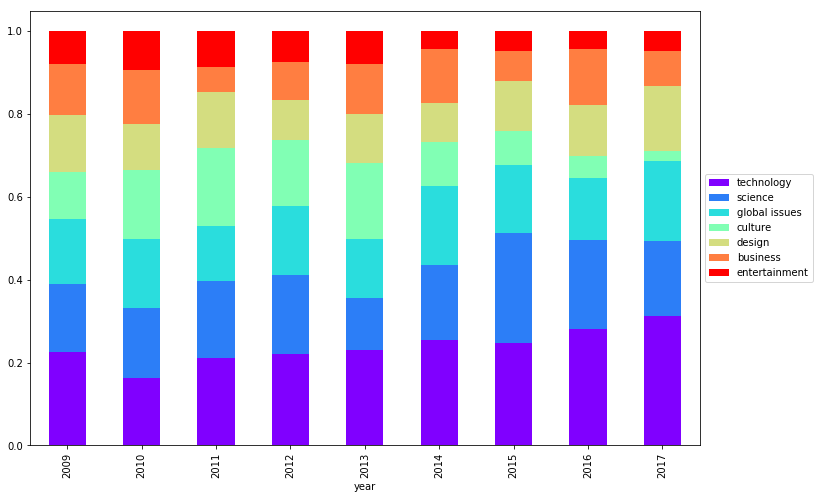

In [14]:
themes = list(pop_themes.head(8)['theme'])
themes.remove('TEDx')
ctab = pd.crosstab([pop_theme_talks['year']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Different types of Talks

In [15]:
#Inspect Rating Dictionary
df.iloc[1]['ratings']

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [16]:
df['ratings'] = df['ratings'].apply(lambda x: ast.literal_eval(x))

In [17]:
#Creating Features
df['funny'] = df['ratings'].apply(lambda x: x[0]['count'])
df['jawdrop'] = df['ratings'].apply(lambda x: x[-3]['count'])
df['beautiful'] = df['ratings'].apply(lambda x: x[3]['count'])
df['confusing'] = df['ratings'].apply(lambda x: x[2]['count'])

# Funniest Talks

In [18]:
#funniest
df[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False)[:5]

,title,main_speaker,views,published_date,funny
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,21444
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,19645
1030,How to live before you die,Steve Jobs,8744428,06-10-2011,17290
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,14447
1129,The happy secret to better work,Shawn Achor,16209727,02-02-2012,11213


# Most Beautiful Talks

In [19]:
#most beautiful
df[['title', 'main_speaker', 'views', 'published_date', 'beautiful']].sort_values('beautiful', ascending=False)[:5]

,title,main_speaker,views,published_date,beautiful
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,9437
677,How great leaders inspire action,Simon Sinek,34309432,04-05-2010,8845
381,Your elusive creative genius,Elizabeth Gilbert,13155478,09-02-2009,8130
2161,Inside the mind of a master procrastinator,Tim Urban,14745406,16-03-2016,7445
1129,The happy secret to better work,Shawn Achor,16209727,02-02-2012,7315


# Jaw dropping Talks

In [20]:
#jaw dropping
df[['title', 'main_speaker', 'views', 'published_date', 'jawdrop']].sort_values('jawdrop', ascending=False)[:5]

,title,main_speaker,views,published_date,jawdrop
4,The best stats you've ever seen,Hans Rosling,12005869,28-06-2006,2542
1163,The power of introverts,Susan Cain,17629275,03-03-2012,2467
381,Your elusive creative genius,Elizabeth Gilbert,13155478,09-02-2009,2093
1030,How to live before you die,Steve Jobs,8744428,06-10-2011,1368
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,1174


# Confusing Talks

In [21]:
#confusing
df[['title', 'main_speaker', 'views', 'published_date', 'confusing']].sort_values('confusing', ascending=False)[:5]

,title,main_speaker,views,published_date,confusing
1346,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012,11111
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,10464
1163,The power of introverts,Susan Cain,17629275,03-03-2012,10218
246,The transformative power of classical music,Benjamin Zander,9315483,25-06-2008,8108
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,7942


# Most Viewed Talks

In [22]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


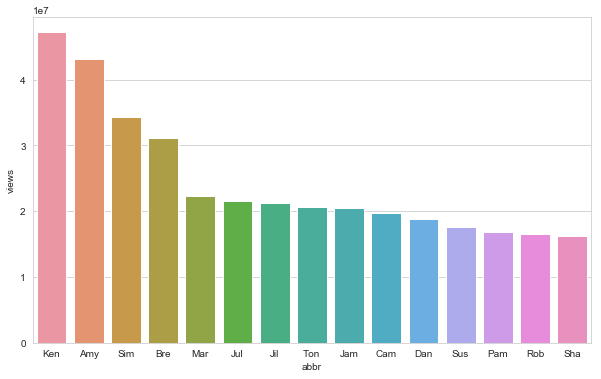

In [23]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

# Analysing TED Talks by the month

In [24]:
#Setting the Order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [25]:
#Split Month from Film_Date
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

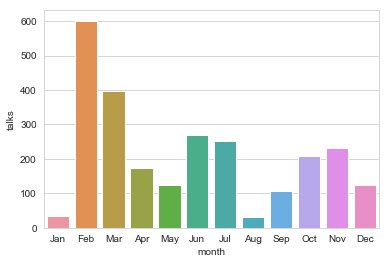

In [26]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

In [27]:
#For TEDx Talks(not TED Conferences)
df_x = df[df['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

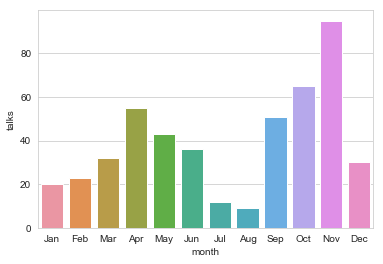

In [28]:
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)

# Days of the week vs. TED Talks

In [29]:
#Split Day from Film_Date
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [30]:
df['day'] = df['film_date'].apply(getday)

In [31]:
day_df = pd.DataFrame(df['day'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']

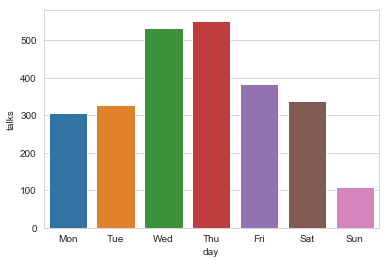

In [32]:
sns.barplot(x='day', y='talks', data=day_df, order=day_order)